In [5]:
import pandas as pd
from PIL import Image
import io

# Function to convert byte string to image
def bytes_to_image(byte_string):
    image = Image.open(io.BytesIO(byte_string))
    return image

# Load train, test, and validation CSV files
train_df = pd.read_csv('F:\\image_captioning\\imagecaption\\train.csv')
test_df = pd.read_csv('F:\\image_captioning\\imagecaption\\test.csv')
valid_df = pd.read_csv('F:\\image_captioning\\imagecaption\\valid.csv')

# Convert byte arrays to images
train_df['image'] = train_df['image'].apply(lambda x: bytes_to_image(eval(x)['bytes']))
test_df['image'] = test_df['image'].apply(lambda x: bytes_to_image(eval(x)['bytes']))
valid_df['image'] = valid_df['image'].apply(lambda x: bytes_to_image(eval(x)['bytes']))

# Verify the loaded dataset
print(train_df.head())
print(train_df.shape)

# Now you can proceed with further preprocessing and model training


                       filename  \
0    rsicd_images/airport_1.jpg   
1   rsicd_images/airport_10.jpg   
2  rsicd_images/airport_100.jpg   
3  rsicd_images/airport_101.jpg   
4  rsicd_images/airport_102.jpg   

                                            captions  \
0  ['Many aircraft are parked next to a long buil...   
1  ['some planes are parked in an airport.'\n 'th...   
2  ['Many aircraft are parked in an airport near ...   
3  ['Many aircraft are parked near a large buildi...   
4  ['several buildings and green trees are around...   

                                               image  
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
1  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
2  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
3  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
4  <PIL.JpegImagePlugin.JpegImageFile image mode=...  
(8734, 3)


In [4]:
import pandas as pd
from PIL import Image
import io
import os

# Function to convert byte string to image
def bytes_to_image(byte_string):
    image = Image.open(io.BytesIO(byte_string))
    return image

# Load train, test, and validation CSV files
train_df = pd.read_csv('F:\\image_captioning\\imagecaption\\train.csv')
test_df = pd.read_csv('F:\\image_captioning\\imagecaption\\test.csv')
valid_df = pd.read_csv('F:\\image_captioning\\imagecaption\\valid.csv')

# Function to save images to specified folder with a given filename
def save_image(dataframe, folder_name):
    # Create the base folder if it doesn't exist
    base_folder_path = 'F:\\image_captioning\\imagecaption'
    folder_path = os.path.join(base_folder_path, folder_name)
    os.makedirs(folder_path, exist_ok=True)
    
    # Create the subdirectory for images
    images_subdir = os.path.join(folder_path, 'rsicd_images')
    os.makedirs(images_subdir, exist_ok=True)
    
    # Iterate over the dataframe and save each image
    for index, row in dataframe.iterrows():
        # Convert byte string to image
        image = bytes_to_image(eval(row['image'])['bytes'])
        # Construct the filename
        filename = f"airport_{index + 1}.jpg"
        # Construct the full path
        full_path = os.path.join(images_subdir, filename)
        # Save the image
        image.save(full_path)

# Save images from each dataframe to the respective folders
save_image(train_df, 'train')
save_image(test_df, 'test')
save_image(valid_df, 'valid')

print("Images saved successfully.")


Images saved successfully.


In [6]:
import pandas as pd
import os
import shutil

# Load train, test, and validation CSV files
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
valid_df = pd.read_csv('valid.csv')

# Split caption dataset
train_caption_df = train_df[['filename', 'captions']]
valid_caption_df = valid_df[['filename', 'captions']]
test_caption_df = test_df[['filename', 'captions']]

# Save caption datasets
train_caption_df.to_csv('train_captions.csv', index=False)
valid_caption_df.to_csv('valid_captions.csv', index=False)
test_caption_df.to_csv('test_captions.csv', index=False)

# Create folders if they don't exist
for folder in ['train', 'test', 'valid']:
    os.makedirs(folder, exist_ok=True)

# Define the base path where images are located
base_image_path = 'F:\\image_captioning\\imagecaption'

# Move images to respective folders
for df, folder in zip([train_df, test_df, valid_df], ['train', 'test', 'valid']):
    for index, row in df.iterrows():
        # Construct the source path with the correct folder
        image_path = os.path.join(base_image_path, folder, row['filename'])
        if os.path.exists(image_path):
            # Construct the destination path
            new_image_path = os.path.join(folder, os.path.basename(row['filename']))
            # Move the file
            shutil.move(image_path, new_image_path)
        else:
            print(f"File not found: {image_path}")

print("Images moved successfully to train, test, and valid folders.")


File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_1.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_10.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_100.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_101.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_102.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_103.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_104.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_105.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_106.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_107.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_108.jpg
File not found: F:\image_captioning\imagecaption\train\rsicd_images/airport_109

In [7]:
import pandas as pd
from PIL import Image
import io
import os

# Function to convert byte string to image
def bytes_to_image(byte_string):
    image = Image.open(io.BytesIO(byte_string))
    return image

# Load train, test, and validation CSV files
train_df = pd.read_csv('F:\\image_captioning\\imagecaption\\train.csv')
test_df = pd.read_csv('F:\\image_captioning\\imagecaption\\test.csv')
valid_df = pd.read_csv('F:\\image_captioning\\imagecaption\\valid.csv')

# Create folders if they don't exist
for folder in ['train', 'test', 'valid']:
    os.makedirs(folder, exist_ok=True)

# Convert byte arrays to images and save to respective folders
for df, folder in zip([train_df, test_df, valid_df], ['train', 'test', 'valid']):
    for index, row in df.iterrows():
        image = bytes_to_image(eval(row['image'])['bytes'])
        image_path = os.path.join(folder, f"{index}.jpg")
        image.save(image_path)

print("Images saved successfully to train, test, and valid folders.")


Images saved successfully to train, test, and valid folders.


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import os

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
import os

In [33]:
!pip install huggingface_hub open_clip_torch
!git clone https://github.com/ChenDelong1999/RemoteCLIP/


Cloning into 'RemoteCLIP'...


In [34]:
# @title Load packages and download model weights
from huggingface_hub import hf_hub_download
import torch, open_clip
from PIL import Image
from IPython.display import display

# for model_name in ['RN50'] #, 'ViT-B-32', 'ViT-L-14']: #faster loading
for model_name in ['RN50', 'ViT-B-32', 'ViT-L-14']: #all models
    checkpoint_path = hf_hub_download("chendelong/RemoteCLIP", f"RemoteCLIP-{model_name}.pt", cache_dir='checkpoints')
    print(f'{model_name} is downloaded to {checkpoint_path}.')

c:\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Python311\Lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in F:\image_captioning\imagecaption\checkpoints\models--chendelong--RemoteCLIP. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https

RN50 is downloaded to checkpoints\models--chendelong--RemoteCLIP\snapshots\bf1d8a3ccf2ddbf7c875705e46373bfe542bce38\RemoteCLIP-RN50.pt.
ViT-B-32 is downloaded to checkpoints\models--chendelong--RemoteCLIP\snapshots\bf1d8a3ccf2ddbf7c875705e46373bfe542bce38\RemoteCLIP-ViT-B-32.pt.
ViT-L-14 is downloaded to checkpoints\models--chendelong--RemoteCLIP\snapshots\bf1d8a3ccf2ddbf7c875705e46373bfe542bce38\RemoteCLIP-ViT-L-14.pt.


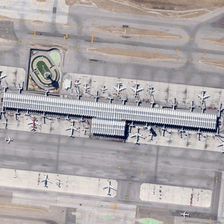

In [117]:
# @title Text caption queries
text_queries = [
    "A busy airport with many aeroplanes.",
    "Satellite view of Hohai university.",
    "Satellite view of sydney",
    "A building next to a lake.",
    "Many people in a stadium.",
    "a cute cat",
]
text = tokenizer(text_queries)
image = Image.open("F:\\image_captioning\\imagecaption\\RemoteCLIP\\assets\\airport.jpg").convert('RGB') #convert to rgb allows it to display as png if the jpg is in cmyk
display(image)


In [118]:
# @title Predicted probabilities
image = preprocess(image).unsqueeze(0)

with torch.no_grad(), torch.cuda.amp.autocast():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    text_probs = (100.0 * image_features @ text_features.T).softmax(dim=-1).cpu().numpy()[0]

print(f'Predictions of {model_name}:')
for query, prob in zip(text_queries, text_probs):
    print(f"{query:<40} {prob * 100:5.1f}%")


Predictions of RN50:
A busy airport with many aeroplanes.       5.9%
Satellite view of Hohai university.        9.5%
Satellite view of sydney                  34.8%
A building next to a lake.                 1.3%
Many people in a stadium.                 46.3%
a cute cat                                 2.2%
